In [1]:
from skimage.morphology import skeletonize, disk, binary_closing
from skimage import io, morphology
from skimage.color import rgb2gray
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
image_path = r"C:\Users\lexro\Desktop\PG Stuff\WassersteinAnalysis\forKMC_150nm_210C_130C_5minCORRECTED.bmp"

In [3]:

image = io.imread(image_path)
# Convert RGB to grayscale
grayscale_image = rgb2gray(image)



In [4]:
# Skeletonize the grayscale image (ensure binary first)
skeleton = skeletonize(grayscale_image > 0.5)

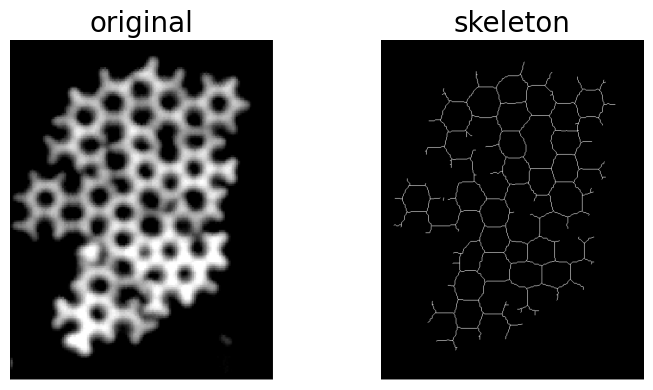

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

In [6]:
# Extract coordinates of skeleton points
skeleton_coords = np.column_stack(np.where(skeleton))
print(len(skeleton_coords))

5637


In [7]:
def get_neighbors(x, y, skeleton, radius=2):
    """
    Find all active skeleton pixels within a specified radius.
    
    Parameters:
    - x, y: Coordinates of the current pixel.
    - skeleton: Binary skeletonized image.
    - radius: Radius within which to search for neighbors.

    Returns:
    - neighbors: List of neighboring pixel coordinates.
    """
    neighbors = []
    height, width = skeleton.shape
    for dx in range(-int(radius), int(radius) + 1):
        for dy in range(-int(radius), int(radius) + 1):
            if dx == 0 and dy == 0:
                continue  # Skip the current pixel
            nx, ny = x + dx, y + dy
            if 0 <= nx < height and 0 <= ny < width:  # Boundary check
                if skeleton[nx, ny]:  # Check if the neighbor is active
                    neighbors.append((nx, ny))
    return neighbors

graph = nx.Graph()

for x, y in skeleton_coords:
    neighbors = get_neighbors(x, y, skeleton, radius=1)
    if len(neighbors) > 2:
        graph.add_node((x, y))

def walker(node, start, nodes, skeleton, visited):
    # assumes a start pixel that is in skeleton
    neighbors = get_neighbors(*start, skeleton, radius = 1)
    neighbors = [n for n in neighbors if n != node and n not in visited] # exclude start node

    if len(neighbors) == 0:
        print(f"Reached endpoint at position {start}")
        return

    for n in neighbors:
        if n in nodes:
            print(f"Node {node} connects to node {n}")
            return n
        visited.append(n)
        walker(node, n, nodes, skeleton, visited)

visited = []
print(len(graph.nodes))
for node in graph.nodes:
    print("test")
    end_node = walker(node, node, graph.nodes, skeleton, visited)



434
test
Reached endpoint at position (59, 179)
Node (64, 179) connects to node (65, 179)
test
Reached endpoint at position (41, 270)
Node (64, 263) connects to node (65, 262)
test
Node (65, 179) connects to node (64, 179)
test
Node (65, 180) connects to node (64, 179)
test
Node (65, 262) connects to node (64, 263)
test
Node (65, 263) connects to node (64, 263)
test
Node (66, 179) connects to node (65, 179)
test
Reached endpoint at position (75, 420)
Node (79, 419) connects to node (80, 419)
test
Node (80, 419) connects to node (79, 419)
test
Node (80, 420) connects to node (79, 419)
test
Reached endpoint at position (61, 322)
Node (84, 309) connects to node (85, 308)
test
Node (85, 308) connects to node (84, 309)
test
Node (85, 309) connects to node (84, 309)
test
Node (86, 277) connects to node (65, 263)
Node (86, 277) connects to node (87, 277)
test
Node (86, 309) connects to node (85, 308)
test
Node (87, 184) connects to node (66, 179)
Node (87, 184) connects to node (88, 183)
test

Node (271, 242) connects to node (248, 229)
Node (271, 242) connects to node (271, 243)
test
Node (271, 243) connects to node (271, 242)
test
Node (272, 242) connects to node (271, 242)
test
Reached endpoint at position (261, 49)
Node (273, 54) connects to node (274, 53)
test
Reached endpoint at position (270, 84)
Node (273, 83) connects to node (274, 82)
test
Node (274, 53) connects to node (273, 54)
test
Node (274, 54) connects to node (273, 54)
test
Node (274, 55) connects to node (273, 54)
test
Node (274, 82) connects to node (273, 83)
test
Node (274, 83) connects to node (273, 83)
test
Reached endpoint at position (279, 396)
Node (286, 395) connects to node (287, 395)
test
Node (287, 395) connects to node (286, 395)
test
Node (287, 396) connects to node (286, 395)
test
Node (290, 316) connects to node (268, 328)
Node (290, 316) connects to node (291, 315)
test
Node (291, 292) connects to node (270, 278)
Node (291, 292) connects to node (292, 292)
test
Node (291, 315) connects to n

Node (435, 150) connects to node (434, 149)
test
Node (435, 181) connects to node (400, 195)
Node (435, 181) connects to node (436, 180)
test
Node (436, 180) connects to node (435, 150)
Node (436, 180) connects to node (435, 181)
test
Node (436, 181) connects to node (435, 181)
test
Node (437, 181) connects to node (436, 180)
test
Node (450, 242) connects to node (422, 245)
Node (450, 242) connects to node (451, 241)
test
Node (450, 357) connects to node (423, 357)
Node (450, 357) connects to node (451, 356)
test
Node (451, 241) connects to node (450, 242)
test
Node (451, 242) connects to node (450, 242)
test
Node (451, 356) connects to node (450, 357)
test
Node (451, 357) connects to node (450, 357)
test
Node (456, 196) connects to node (437, 181)
Node (456, 196) connects to node (451, 241)
Node (456, 196) connects to node (489, 184)
test
Node (457, 303) connects to node (426, 303)
Node (457, 303) connects to node (458, 302)
test
Node (458, 302) connects to node (457, 303)
test
Node (

In [8]:
def get_neighbors(x, y, skeleton, radius=1):
    """
    Find all active skeleton pixels within a specified radius.
    """
    neighbors = []
    height, width = skeleton.shape
    for dx in range(-int(radius), int(radius) + 1):
        for dy in range(-int(radius), int(radius) + 1):
            if dx == 0 and dy == 0:
                continue  # Skip the current pixel
            nx, ny = x + dx, y + dy
            if 0 <= nx < height and 0 <= ny < width and skeleton[nx, ny]:  # Check bounds and activity
                neighbors.append((nx, ny))
    return neighbors

# Convert skeleton coordinates to a graph
graph = nx.Graph()
for x, y in skeleton_coords:
    neighbors = get_neighbors(x, y, skeleton, radius=1)
    if len(neighbors) > 2:  # Only add junction nodes
        graph.add_node((x, y))

def walker(node, start, nodes, skeleton, visited_edges, connected_pairs):
    """
    Walk along the skeleton from the start pixel until another node is encountered.
    Record all pairs of connected nodes.

    Parameters:
    - node: The starting node of the current traversal.
    - start: The current pixel being processed.
    - nodes: Set of all nodes in the skeleton.
    - skeleton: Binary skeletonized image.
    - visited_edges: Set of already visited edges.
    - connected_pairs: Set to store pairs of connected nodes.

    Returns:
    - None
    """
    neighbors = get_neighbors(*start, skeleton, radius=1)
    neighbors = [n for n in neighbors if n != node]  # Exclude the previous node

    for n in neighbors:
        edge = (start, n)
        if edge in visited_edges or (n, start) in visited_edges:
            continue  # Skip already visited edges

        visited_edges.add(edge)  # Mark the edge as visited

        if n in nodes:  # Found another node
            pair = tuple(sorted([node, n]))  # Create an ordered pair
            connected_pairs.add(pair)  # Record the pair
            return  # Stop traversal when a node is found

        # Continue walking to find the next node
        walker(node, n, nodes, skeleton, visited_edges, connected_pairs)


# Initialize variables
visited_edges = set()
connected_pairs = set()
nodes = set(graph.nodes)

# Process all nodes to find connected pairs
for node in graph.nodes:
    walker(node, node, nodes, skeleton, visited_edges, connected_pairs)

# Output the connected pairs
print(f"Connected node pairs: {connected_pairs}")



Connected node pairs: {((197, 222), (220, 235)), ((350, 196), (350, 234)), ((400, 195), (400, 196)), ((323, 185), (323, 186)), ((456, 196), (489, 184)), ((565, 135), (566, 135)), ((268, 278), (269, 278)), ((399, 195), (400, 195)), ((142, 283), (142, 284)), ((253, 175), (254, 176)), ((419, 148), (420, 148)), ((348, 139), (349, 140)), ((141, 283), (142, 283)), ((265, 175), (266, 176)), ((385, 276), (415, 274)), ((516, 227), (516, 228)), ((149, 112), (150, 112)), ((384, 275), (385, 276)), ((121, 420), (145, 410)), ((102, 323), (103, 323)), ((89, 217), (90, 216)), ((269, 277), (271, 243)), ((87, 277), (87, 278)), ((325, 242), (325, 243)), ((215, 333), (216, 364)), ((451, 241), (451, 242)), ((479, 333), (480, 333)), ((144, 216), (144, 217)), ((463, 137), (464, 137)), ((557, 186), (558, 186)), ((146, 409), (146, 410)), ((271, 242), (272, 242)), ((415, 328), (416, 328)), ((120, 365), (146, 377)), ((287, 395), (287, 396)), ((384, 276), (385, 276)), ((170, 370), (171, 369)), ((273, 83), (274, 8

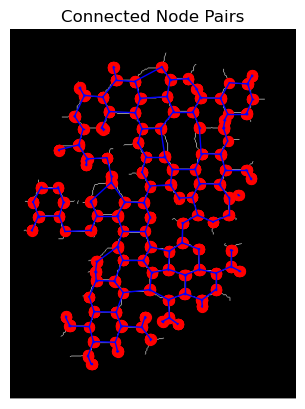

In [10]:
def visualize_connected_pairs(skeleton, connected_pairs):
    """Visualize the skeleton and its connected node pairs."""
    plt.imshow(skeleton, cmap="gray")

    for pair in connected_pairs:
        start, end = pair
        plt.plot([start[1], end[1]], [start[0], end[0]], c="blue", linewidth=1)
        plt.scatter(start[1], start[0], c="red", s=50)
        plt.scatter(end[1], end[0], c="red", s=50)

    plt.title("Connected Node Pairs")
    plt.axis("off")
    plt.show()

# Visualize the connected pairs
visualize_connected_pairs(skeleton, connected_pairs)


In [11]:
# Initialize the graph with nodes
graph = nx.Graph()
graph.add_nodes_from(graph.nodes)  # Assuming nodes have already been added

# Add edges to the graph
for pair in connected_pairs:
    graph.add_edge(*pair)

# Print the edges in the graph
print("Edges in the graph:")
print(list(graph.edges))


Edges in the graph:
[((197, 222), (220, 235)), ((197, 222), (196, 221)), ((220, 235), (220, 236)), ((220, 235), (221, 235)), ((350, 196), (350, 234)), ((350, 196), (349, 195)), ((350, 196), (350, 195)), ((350, 234), (376, 243)), ((350, 234), (326, 242)), ((400, 195), (400, 196)), ((400, 195), (399, 195)), ((400, 195), (435, 181)), ((400, 196), (400, 230)), ((400, 196), (399, 195)), ((323, 185), (323, 186)), ((323, 185), (324, 186)), ((323, 185), (322, 186)), ((323, 185), (323, 151)), ((323, 186), (322, 186)), ((456, 196), (489, 184)), ((456, 196), (451, 241)), ((456, 196), (437, 181)), ((489, 184), (490, 184)), ((489, 184), (490, 183)), ((565, 135), (566, 135)), ((565, 135), (541, 144)), ((565, 135), (566, 134)), ((566, 135), (566, 134)), ((268, 278), (269, 278)), ((268, 278), (243, 281)), ((268, 278), (269, 277)), ((269, 278), (269, 277)), ((399, 195), (378, 186)), ((142, 283), (142, 284)), ((142, 283), (141, 283)), ((142, 283), (171, 261)), ((142, 284), (142, 316)), ((142, 284), (141

In [12]:
# Count the degree of each node
node_degrees = dict(graph.degree())

# Print the number of nodes connected to each node
for node, degree in node_degrees.items():
    print(f"Node {node} is connected to {degree} node(s) through a single edge.")


Node (197, 222) is connected to 2 node(s) through a single edge.
Node (220, 235) is connected to 3 node(s) through a single edge.
Node (350, 196) is connected to 3 node(s) through a single edge.
Node (350, 234) is connected to 3 node(s) through a single edge.
Node (400, 195) is connected to 3 node(s) through a single edge.
Node (400, 196) is connected to 3 node(s) through a single edge.
Node (323, 185) is connected to 4 node(s) through a single edge.
Node (323, 186) is connected to 2 node(s) through a single edge.
Node (456, 196) is connected to 3 node(s) through a single edge.
Node (489, 184) is connected to 3 node(s) through a single edge.
Node (565, 135) is connected to 3 node(s) through a single edge.
Node (566, 135) is connected to 2 node(s) through a single edge.
Node (268, 278) is connected to 3 node(s) through a single edge.
Node (269, 278) is connected to 2 node(s) through a single edge.
Node (399, 195) is connected to 3 node(s) through a single edge.
Node (142, 283) is connec

In [13]:
def merge_close_nodes(graph, threshold=2):
    """
    Merge nodes that are closer than the given threshold and update connectivity.

    Parameters:
    - graph: NetworkX graph.
    - threshold: Distance threshold for merging nodes (in pixels).

    Returns:
    - new_graph: A new NetworkX graph with merged nodes.
    """
    # Get node positions as a NumPy array
    nodes = list(graph.nodes)
    positions = np.array(nodes)

    # Track merged nodes
    merged_nodes = {}
    processed = set()

    for i, pos in enumerate(positions):
        if tuple(pos) in processed:
            continue

        # Find nodes within the threshold distance
        distances = np.linalg.norm(positions - pos, axis=1)
        close_indices = np.where((distances <= threshold) & (distances > 0))[0]
        close_nodes = [tuple(positions[idx]) for idx in close_indices]

        if close_nodes:
            # Merge current node and close nodes into a single node
            all_nodes = [tuple(pos)] + close_nodes
            merged_node = tuple(np.round(np.mean(all_nodes, axis=0)).astype(int))
            for node in all_nodes:
                merged_nodes[node] = merged_node
                processed.add(node)

            processed.add(tuple(pos))
        else:
            # No close nodes; keep the current node as is
            merged_nodes[tuple(pos)] = tuple(pos)

    # Create a new graph with merged nodes
    new_graph = nx.Graph()

    # Add merged nodes
    for old_node, new_node in merged_nodes.items():
        if new_node not in new_graph:
            new_graph.add_node(new_node)

    # Add edges, updating to merged nodes
    for u, v in graph.edges:
        new_u = merged_nodes.get(u, u)
        new_v = merged_nodes.get(v, v)
        if new_u != new_v:  # Avoid self-loops from merged nodes
            new_graph.add_edge(new_u, new_v)

    return new_graph


In [14]:
# Original graph
print("Original graph:")
print(f"Nodes: {list(graph.nodes)}")
print(f"Edges: {list(graph.edges)}")

# Merge nodes that are too close
merged_graph = merge_close_nodes(graph, threshold=2)

# Output merged graph
print("\nMerged graph:")
print(f"Nodes: {list(merged_graph.nodes)}")
print(f"Edges: {list(merged_graph.edges)}")


Original graph:
Nodes: [(197, 222), (220, 235), (350, 196), (350, 234), (400, 195), (400, 196), (323, 185), (323, 186), (456, 196), (489, 184), (565, 135), (566, 135), (268, 278), (269, 278), (399, 195), (142, 283), (142, 284), (253, 175), (254, 176), (419, 148), (420, 148), (348, 139), (349, 140), (141, 283), (265, 175), (266, 176), (385, 276), (415, 274), (516, 227), (516, 228), (149, 112), (150, 112), (384, 275), (121, 420), (145, 410), (102, 323), (103, 323), (89, 217), (90, 216), (269, 277), (271, 243), (87, 277), (87, 278), (325, 242), (325, 243), (215, 333), (216, 364), (451, 241), (451, 242), (479, 333), (480, 333), (144, 216), (144, 217), (463, 137), (464, 137), (557, 186), (558, 186), (146, 409), (146, 410), (271, 242), (272, 242), (415, 328), (416, 328), (120, 365), (146, 377), (287, 395), (287, 396), (384, 276), (170, 370), (171, 369), (273, 83), (274, 83), (369, 298), (370, 298), (489, 145), (490, 145), (244, 373), (268, 363), (92, 380), (94, 411), (143, 217), (86, 277), (

In [15]:
def plot_graph_on_skeleton(skeleton, graph, title="Graph on Skeleton"):
    """
    Plot the graph nodes and edges over the original skeleton.

    Parameters:
    - skeleton: 2D binary skeletonized image.
    - graph: NetworkX graph with nodes and edges.
    - title: Title for the plot.
    """
    plt.figure(figsize=(10, 10))

    # Display the skeleton image
    plt.imshow(skeleton, cmap="gray", interpolation="nearest")

    # Plot edges
    for u, v in graph.edges:
        plt.plot([u[1], v[1]], [u[0], v[0]], color="blue", linewidth=2, label="Edge")

    # Plot nodes
    for node in graph.nodes:
        plt.scatter(node[1], node[0], color="red", s=100, label="Node")

    # Add labels and title
    plt.title(title)
    plt.axis("off")
    plt.show()



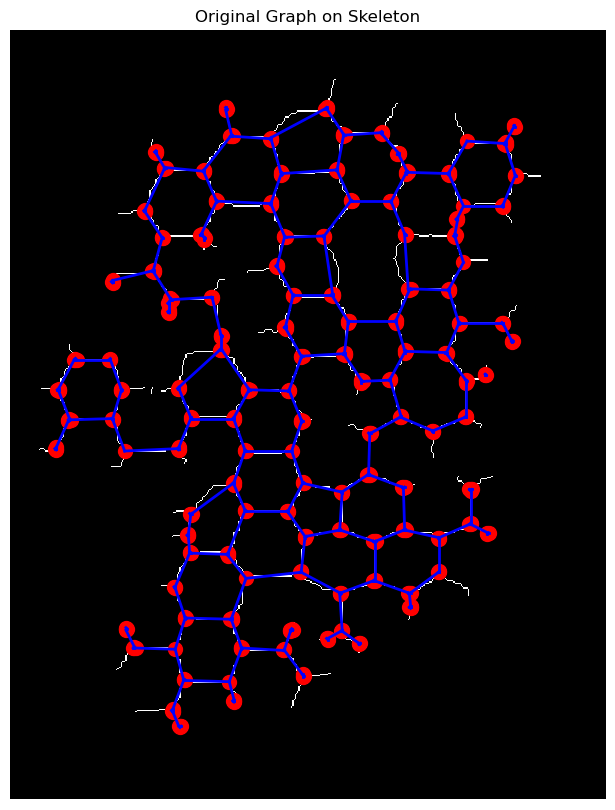

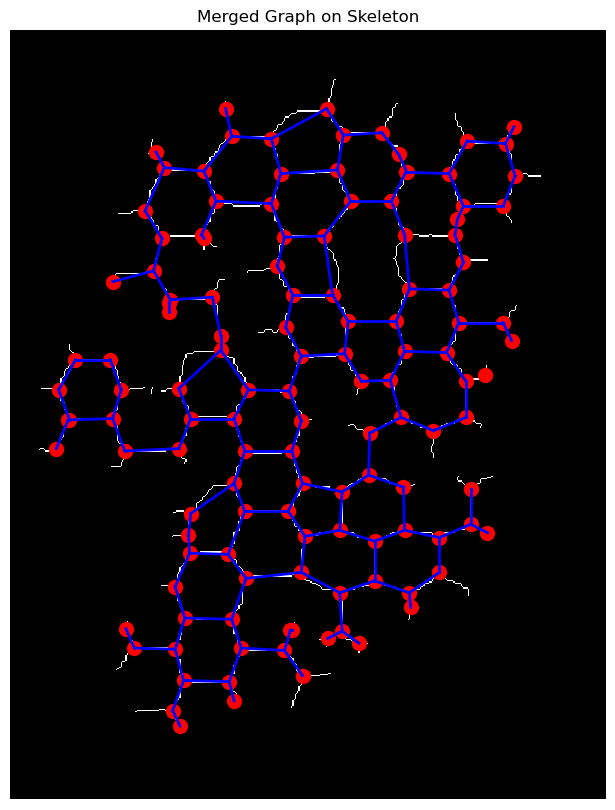

In [16]:
# Plot the original graph
plot_graph_on_skeleton(skeleton, graph, title="Original Graph on Skeleton")

# Plot the merged graph
plot_graph_on_skeleton(skeleton, merged_graph, title="Merged Graph on Skeleton")


In [17]:
import matplotlib.pyplot as plt

def plot_degree_histogram(graph):
    """
    Plot a histogram of node degrees in the graph.

    Parameters:
    - graph: NetworkX graph.
    - title: Title for the histogram.
    """
    # Get the degree of each node
    degrees = [degree for _, degree in graph.degree()]
    
    # Create the histogram
    plt.figure(figsize=(8, 6))
    plt.hist(degrees, bins=range(1, max(degrees) + 2), align="left", color="blue", edgecolor="black")
    plt.xlabel("Number of Connections (Degree)")
    plt.ylabel("Frequency")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


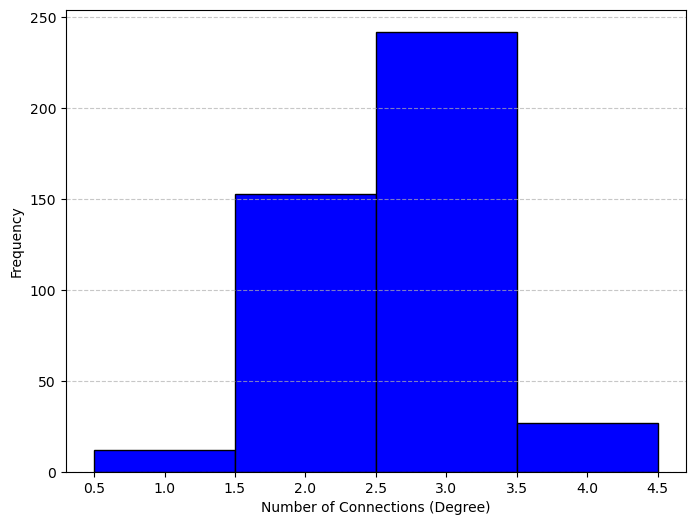

In [18]:
plot_degree_histogram(graph)

In [27]:
def plot_analysis(original_image, skeleton, merged_graph):
    """
    Create a 2x2 subplot with:
    1. Original image.
    2. Skeleton overlayed on the original image.
    3. Merged node graph overlaid on the skeleton.
    4. Histogram of node connectivity.

    Parameters:
    - original_image: Original image array (2D).
    - skeleton: Skeletonized image array (2D binary).
    - merged_graph: NetworkX graph with merged nodes and edges.
    """
    # Prepare node degrees for the histogram
    degrees = [degree for _, degree in merged_graph.degree()]
    
    # Set up the figure
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    
    # (a) Original image
    axes[0, 0].imshow(original_image)
    axes[0, 0].set_title("a)", loc='left')
    axes[0, 0].set_title("Original Image")
    axes[0, 0].axis("off")
    
    # (b) Skeleton overlaid on the original image
    axes[0, 1].imshow(original_image, cmap="gray")
    axes[0, 1].imshow(skeleton, cmap="hot", alpha=0.7)  # Overlay skeleton in red
    axes[0, 1].set_title("Skeletonized")
    axes[0, 1].set_title("b)", loc='left')
    axes[0, 1].axis("off")
    
    # (c) Merged graph overlaid on the skeleton
    axes[1, 0].imshow(skeleton, cmap="gray", interpolation="nearest")
    for u, v in merged_graph.edges:
        axes[1, 0].plot([u[1], v[1]], [u[0], v[0]], color="blue", linewidth=2)
    for node in merged_graph.nodes:
        axes[1, 0].scatter(node[1], node[0], color="red", s=100)
    axes[1, 0].set_title("Graph Representation")
    axes[1, 0].set_title("c)", loc='left')
    axes[1, 0].axis("off")
    
    # (d) Histogram of connectivity
    axes[1, 1].hist(degrees, bins=range(1, max(degrees) + 2), align="left", color="blue", edgecolor="black")
    axes[1, 1].set_title("Node Connectivity Histogram")
    axes[1, 1].set_title("d)", loc='left')
    axes[1, 1].set_xlabel("Number of Connections (Degree)")
    axes[1, 1].set_ylabel("Frequency")
    axes[1, 1].grid(axis="y", linestyle="--", alpha=0.7)
    # Adjust layout
    plt.tight_layout()
    # plt.savefig(r"example-skeletonization.svg")
    plt.savefig('process.pdf')
    plt.show()



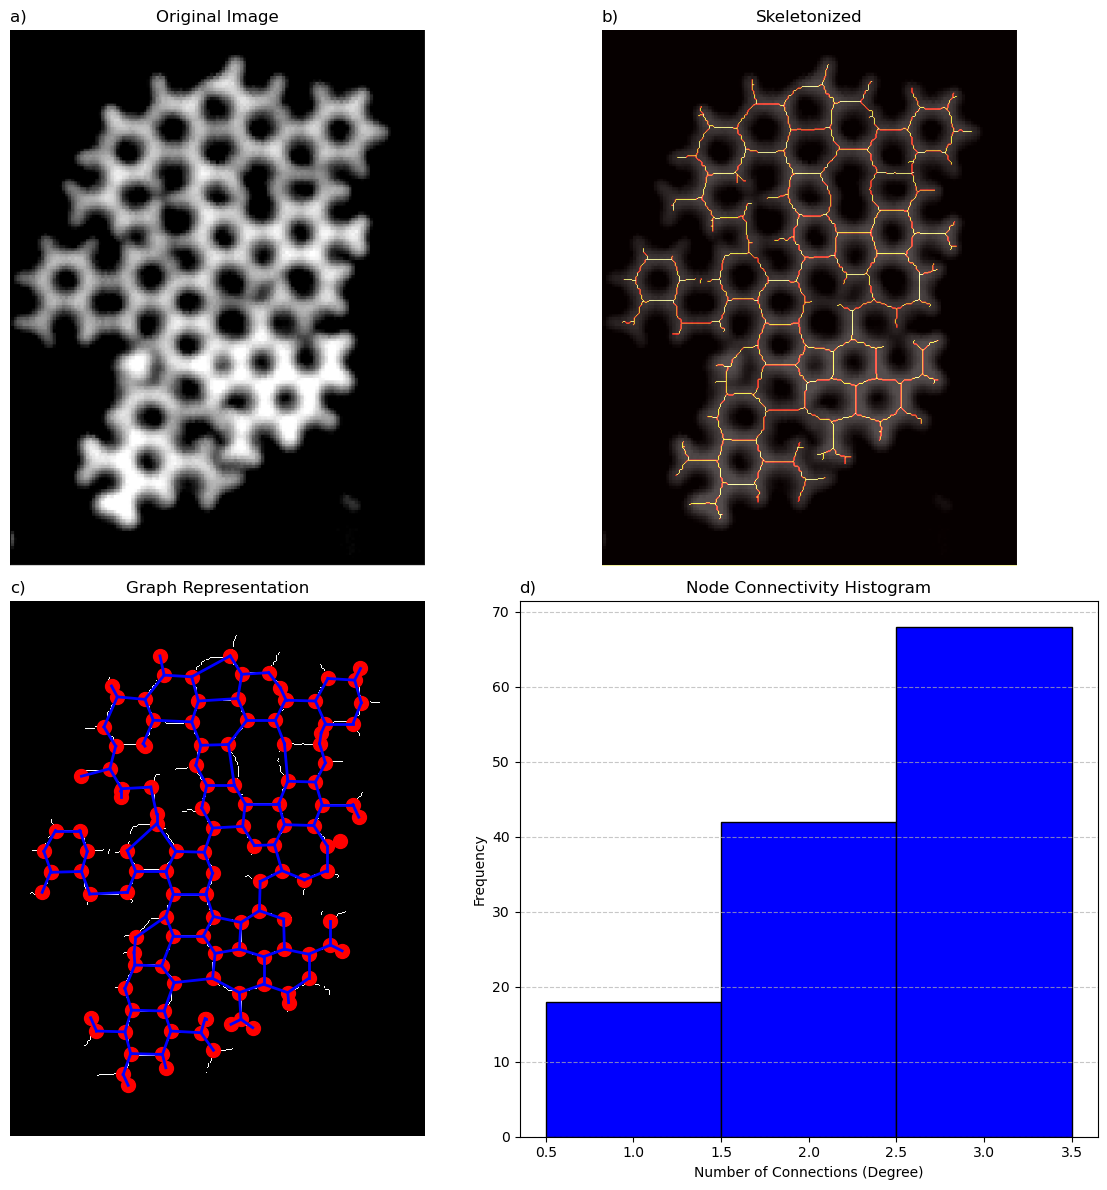

In [28]:
# Call the function with the relevant data
plot_analysis(image, skeleton, merged_graph)


In [ ]:
def compute_center_of_mass_and_radius_of_gyration(graph):
    """
    Compute the center of mass and radius of gyration of the graph.

    Parameters:
    - graph: NetworkX graph with nodes.

    Returns:
    - center_of_mass: Tuple (x_com, y_com) representing the center of mass.
    - radius_of_gyration: The radius of gyration of the graph.
    """
    # Step 1: Get node positions
    nodes = np.array(graph.nodes)

    # Step 2: Compute center of mass
    x_com = np.mean(nodes[:, 0])
    y_com = np.mean(nodes[:, 1])
    center_of_mass = (x_com, y_com)

    # Step 3: Compute radius of gyration
    squared_displacements = (nodes[:, 0] - x_com) ** 2 + (nodes[:, 1] - y_com) ** 2
    radius_of_gyration = np.sqrt(np.sum(squared_displacements) / len(nodes))

    return center_of_mass, radius_of_gyration


In [ ]:
def compute_mean_displacement_to_neighbors(graph):
    """
    Compute the mean displacement between nodes and their nearest neighbors.

    Parameters:
    - graph: NetworkX graph with nodes and edges.

    Returns:
    - mean_displacement: The mean Euclidean distance between nodes and their neighbors.
    """
    displacements = []

    # Iterate through all nodes
    for node in graph.nodes:
        for neighbor in graph.neighbors(node):
            # Calculate Euclidean distance between the node and its neighbor
            displacement = np.sqrt((node[0] - neighbor[0]) ** 2 + (node[1] - neighbor[1]) ** 2)
            displacements.append(displacement)

    # Compute the mean displacement
    mean_displacement = np.mean(displacements)

    return mean_displacement


In [ ]:
mean_displacement = compute_mean_displacement_to_neighbors(merged_graph)
center_of_mass, radius_of_gyration = compute_center_of_mass_and_radius_of_gyration(merged_graph)

# Output results
print(f"Center of Mass: {center_of_mass}")
print(f"Radius of Gyration: {radius_of_gyration/mean_displacement:.2f}")


In [ ]:
import os
import csv

def save_graph_metrics_to_csv(image_path, graph):
    """
    Compute and save graph metrics to a CSV file.

    Metrics:
    1. Mean distance between nearest neighboring nodes.
    2. Radius of gyration of the graph.
    3. Number of nodes in the graph.
    4. Nearest neighbor frequency histogram.

    Parameters:
    - image_path: Path to the image file (used to derive the CSV filename).
    - graph: NetworkX graph with nodes and edges.

    Returns:
    - None
    """
    # Compute mean distance between nearest neighbors
    mean_displacement = compute_mean_displacement_to_neighbors(graph)

    # Compute center of mass and radius of gyration
    _, radius_of_gyration = compute_center_of_mass_and_radius_of_gyration(graph)

    # Get number of nodes
    num_nodes = len(graph.nodes)

    # Compute degree histogram (nearest neighbor frequency)
    degrees = [degree for _, degree in graph.degree()]
    degree_counts = {degree: degrees.count(degree) for degree in set(degrees)}

    # Derive the CSV file path from the image file path
    base_name = os.path.basename(image_path)
    csv_file_name = os.path.splitext(base_name)[0] + "_graph_metrics.csv"

    # Save data to CSV
    with open(csv_file_name, mode="w", newline="") as csv_file:
        writer = csv.writer(csv_file)

        # Write headers
        writer.writerow(["Metric", "Value"])
        writer.writerow(["Mean Distance Between Nearest Neighbors", mean_displacement])
        writer.writerow(["Radius of Gyration", radius_of_gyration])
        writer.writerow(["Number of Nodes", num_nodes])

        # Write degree histogram
        writer.writerow([])  # Blank row for separation
        writer.writerow(["Degree", "Frequency"])
        for degree, count in sorted(degree_counts.items()):
            writer.writerow([degree, count])

    print(f"Metrics saved to {csv_file_name}")


In [ ]:
save_graph_metrics_to_csv(image_path, merged_graph)